In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/KITTI/08'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


KeyboardInterrupt: ignored

In [ ]:
weights = models.AlexNet_Weights
model = models.alexnet(weights=weights)

In [ ]:
for n_it in range(1,83):
  output_ = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*100
    max_ = n_it*100
    aux_ = min_ +1
    for i, data in enumerate(train_loader_r):
      if i > min_ and i <= max_:
        inputs, labels = data
        outputs = model(inputs)
        output_.append(outputs)
    for i,data in enumerate(train_loader_l):
      if i > min_ and i <= max_:
        inputs, labels = data
        outputs = model(inputs)
        output_[i-aux_] = torch.cat((output_[i-aux_], outputs), 1)
    out_path = '/content/drive/MyDrive/Datasets/tensors_kitti_08_alexnet/tensors'+str(n_it)+'.pt'
    torch.save(output_,out_path)
  except:
    print('error')

In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 25)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:

database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55,database56,database57,database58,database59,database60,
            database61,database62,database63,database64,database65,database66,database67,database68,database69,database70,
            database71,database72,database73,database74,database75,database76,database77,database78,database79,database80,
            database81,database82]
d = []

In [ ]:
co = 0
for bg in database:
  co += 1
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      with open('/content/drive/MyDrive/Datasets/KITTI/loop_kitti_08_alexnet.txt', 'a') as txt_file:
        if loop_ > 0:
          txt_file.write('Found loop')
          image_number = (co*50)+i
          txt_file.write('\n image: '+str(image_number))
          txt_file.write('\n')
        else:
          d.append(data)



loop
tensor([[ 0.0878,  0.1562, -1.0967,  ..., -0.7275, -0.5303, -0.8444]],
       requires_grad=True)
loop
tensor([[ 0.0878,  0.1562, -1.0967,  ..., -0.7275, -0.5303, -0.8444]],
       requires_grad=True)
loop
tensor([[-0.4618, -0.9187, -1.3345,  ..., -1.0229, -0.4297, -0.4461]],
       requires_grad=True)
loop
tensor([[-0.2052, -0.4672, -0.9405,  ..., -1.1794,  0.2344, -0.7487]],
       requires_grad=True)
loop
tensor([[ 0.0951, -0.4675, -0.5286,  ..., -0.4205,  1.4162,  0.0797]],
       requires_grad=True)
loop
tensor([[-0.5341, -0.4802, -0.6697,  ..., -0.9821,  0.6910, -1.1937]],
       requires_grad=True)
loop
tensor([[ 0.2397, -0.5293, -0.6098,  ..., -1.0805,  0.5278, -0.9363]],
       requires_grad=True)
loop
tensor([[-1.2949, -0.6714, -1.2937,  ..., -1.3296, -0.1529, -0.6719]],
       requires_grad=True)
loop
tensor([[-0.8481, -0.6117, -1.2397,  ..., -0.4307,  0.9052,  0.4105]],
       requires_grad=True)
loop
tensor([[ 0.6539, -0.1911, -0.2186,  ..., -0.2409,  1.2215,  0.0518]

In [ ]:
c = 0
for d in database2:
    distance = torch.cdist(d, database1[0], p=2)
    max_dist = torch.max(distance)
    print('image: {}, distance: {}'.format(c, max_dist))
    c += 1

image: 0, distance: 44.250091552734375
image: 1, distance: 55.12140655517578
image: 2, distance: 56.24427032470703
image: 3, distance: 44.06982421875
image: 4, distance: 42.0426139831543
image: 5, distance: 54.284305572509766
image: 6, distance: 27.490169525146484
image: 7, distance: 45.791542053222656
image: 8, distance: 51.57185363769531
image: 9, distance: 50.75006866455078
image: 10, distance: 50.92274856567383
image: 11, distance: 56.006919860839844
image: 12, distance: 53.485599517822266
image: 13, distance: 50.83257293701172
image: 14, distance: 50.856475830078125
image: 15, distance: 52.846961975097656
image: 16, distance: 55.090755462646484
image: 17, distance: 30.917438507080078
image: 18, distance: 56.7564697265625
image: 19, distance: 52.0532341003418
image: 20, distance: 50.147403717041016
image: 21, distance: 54.63591003417969
image: 22, distance: 53.77736282348633
image: 23, distance: 54.44342803955078
image: 24, distance: 54.901939392089844
image: 25, distance: 54.66943

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/kitti_08_alexnet.csv')


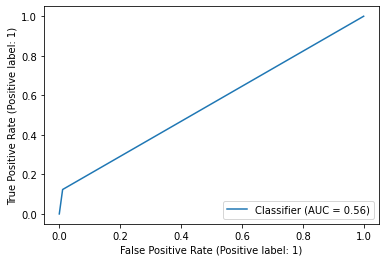

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.5562558910574572
Accuracy:  0.9201474201474201
f1:  0.19753086419753085


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[3705,   41],
       [ 284,   40]])